In [ ]:
# Importing libraries

# Data processing
import pandas as pd
import requests
# Text preprocessiong
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

# Import the wordcloud library
from wordcloud import WordCloud
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

# Clustering
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
# Count vectorization
from sklearn.feature_extraction.text import CountVectorizer
# Sentence transformer
from sentence_transformers import SentenceTransformer
# Flair
from transformers.pipelines import pipeline
from flair.embeddings import TransformerDocumentEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, StackedEmbeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [ ]:


url = 'https://drive.google.com/uc?export=download&id=167Bs5-k8Ggcfb-JBls4jTx0FavnVTTbD'
filename = 'mould_txt.xls'

try:
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

    print(f"Downloaded {filename}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading {filename}: {e}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloaded mould_txt.xls


In [ ]:
df = pd.read_excel('./mould_txt.xls')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Arslan, C; Aksahin, EC; Yilmaz, RBN; Cakan, DG",NaN,NaN,NaN,"Arslan, Can; Aksahin, Elif Ceren; Yilmaz, Rahi...",NaN,NaN,Does YouTube (TM) Offer High-Quality Informati...,CLEFT PALATE-CRANIOFACIAL JOURNAL,...,"Dentistry, Oral Surgery & Medicine; Surgery",Science Citation Index Expanded (SCI-EXPANDED),"Dentistry, Oral Surgery & Medicine; Surgery",3C8HM,35861787.0,NaN,NaN,2023-04-09,WOS:000828858800001,0
1,J,"Li, TZ; Zhou, J; Yuan, ZA; Liu, RY; Li, JM",NaN,NaN,NaN,"Li, Tianzhu; Zhou, Jie; Yuan, Zenan; Liu, RuYi...",NaN,NaN,Intermittent Changes in Temperature and Humidi...,PLANT DISEASE,...,Plant Sciences,Science Citation Index Expanded (SCI-EXPANDED),Plant Sciences,9H2QM,35802011.0,NaN,NaN,2023-04-09,WOS:000938681800002,0
2,J,"Qin, S; Wang, JR; Liu, SH; Tang, XL; Liu, ZL; ...",NaN,NaN,NaN,"Qin, Shun; Wang, Junrong; Liu, Shihong; Tang, ...",NaN,NaN,First Report of Green Mold Disease Caused by P...,PLANT DISEASE,...,Plant Sciences,Science Citation Index Expanded (SCI-EXPANDED),Plant Sciences,9M5CD,35536206.0,NaN,NaN,2023-04-09,WOS:000942246700002,0
3,J,"Ch, LK; Kamboj, VK; Bath, SK",NaN,NaN,NaN,"Ch, Leela Kumari; Kamboj, Vikram Kumar; Bath, ...",NaN,NaN,Hybridizing slime mould algorithm with simulat...,COMPLEX & INTELLIGENT SYSTEMS,...,"Computer Science, Artificial Intelligence",Science Citation Index Expanded (SCI-EXPANDED),Computer Science,4Q3RI,36160761.0,NaN,NaN,2023-04-09,WOS:000856000700002,0
4,J,"Tuncay, T; Baytar, F; Tuncay, B; Sunar, T; Dis...",NaN,NaN,NaN,"Tuncay, Tansel; Baytar, Furkan; Tuncay, Badegu...",NaN,NaN,Effects of Mold Cavity Geometry on Flow Rate a...,JOURNAL OF MATERIALS ENGINEERING AND PERFORMANCE,...,"Materials Science, Multidisciplinary",Science Citation Index Expanded (SCI-EXPANDED),Materials Science,4Y0IJ,NaN,NaN,NaN,2023-04-09,WOS:000861217900020,0


In [ ]:
columns_to_keep = ["Authors", "Article Title", "Abstract", "Publication Year"]

df = df[columns_to_keep]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Authors,Article Title,Abstract,Publication Year
0,"Arslan, C; Aksahin, EC; Yilmaz, RBN; Cakan, DG",Does YouTube (TM) Offer High-Quality Informati...,Objective To assess the content and quality of...,NaN
1,"Li, TZ; Zhou, J; Yuan, ZA; Liu, RY; Li, JM",Intermittent Changes in Temperature and Humidi...,Environmental temperature and humidity play a ...,NaN
2,"Qin, S; Wang, JR; Liu, SH; Tang, XL; Liu, ZL; ...",First Report of Green Mold Disease Caused by P...,NaN,NaN
3,"Ch, LK; Kamboj, VK; Bath, SK",Hybridizing slime mould algorithm with simulat...,The existing slime mould algorithm clones the ...,NaN
4,"Tuncay, T; Baytar, F; Tuncay, B; Sunar, T; Dis...",Effects of Mold Cavity Geometry on Flow Rate a...,"In this study, the effects of the oxide films ...",NaN


In [ ]:
# Replace NaN values with zeros in the 'Publication Year' column
df['Publication Year'].fillna(0, inplace=True)

# Convert the 'Publication Year' column from float to int
df['Publication Year'] = df['Publication Year'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Authors,Article Title,Abstract,Publication Year
count,12110,12110,11947,12110.000000
unique,11158,11428,11383,NaN
top,"Adamatzky, A",Polymerase chain reaction blood tests for the ...,Disseminated canine mold infections are review...,NaN
freq,10,5,3,NaN
mean,NaN,NaN,NaN,1819.949546
std,NaN,NaN,NaN,595.785087
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,2008.000000
50%,NaN,NaN,NaN,2015.000000
75%,NaN,NaN,NaN,2020.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12110 entries, 0 to 12109
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Authors           12110 non-null  object
 1   Article Title     12110 non-null  object
 2   Abstract          11947 non-null  object
 3   Publication Year  12110 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 378.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df.dropna(subset=['Abstract'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Authors             0
Article Title       0
Abstract            0
Publication Year    0
dtype: int64

In [ ]:
df = df.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
unclean_data = df['Abstract'].to_list()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
unclean_data[:30]

In [ ]:
nltk.download('words')

# Load the set of English words
english_words = set(words.words())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def preprocess_text(text):

    # Remove hyphens and put spaces
    text = re.sub(r'-', ' ', text)

    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)

    # Remove words and numbers in brackets
    text = re.sub(r'\([^)]*\)', '', text)

    # Remove hyphenated words
    text = re.sub(r'\b\w+-\w+\b', '', text)

    # Replace one or two letter words with an empty string
    text = re.sub(r'\b\w{1,2}\b', '', text)

    # Remove abbreviations
    text = re.sub(r'\b(?:[A-Za-z]\.|[A-Za-z][A-Za-z]\.|[A-Za-z]\.[A-Za-z]\.|[A-Za-z]\.[A-Za-z])+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(?:[A-Z]\.|[A-Z][A-Z]\.|[A-Z]\.[A-Z]\.|[A-Z]\.[A-Z]|[A-Z][A-Z][A-Z][A-Z])+', '', text)
    text = re.sub(r'\([A-Za-z]+\.\)', '', text)
    text = re.sub(r'\([^)]*\)', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove brackets
    text = re.sub(r'[\(\)\[\]]', '', text)

    # Remove any special characters
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]|_', ' ', text)

    # Replace mold with mould and molding with moulding
    text = re.sub(r"\bmold\b", "mould", text)
    text = re.sub(r"\bmolds\b", "mould", text)
    text = re.sub(r"\bmolding\b", "mould", text)
    text = re.sub(r"\bmoulds\b", "mould", text)
    text = re.sub(r"\bmoulding\b", "mould", text)
    text = re.sub(r"\bmolded\b", "mould", text)

    # Replace 'injection mould' with 'injection' and 'mould' as separate words
    text = text.replace('injection mould', 'injection mould')

    # Remove specific words
    text = re.sub(r'\b(?:paper|however|recent|result|activity|various|review|non|spp|agents|three|products|method|polymer|micro|low|part|parts|based|including|innclude|new|found|size|well|high|ice|vrc|women|afl|chill|food|paa|pmma|mm|iph|pcr|pdms|two|used|using|afb|use|ppm|hsv|pt|mu|one|also|could|days|due|pmma|mm|iph|pcr|pdms|two|used|using|afb|use|ppm|hsv|pt|mu|one|also|could|days|due|youtube|video)\b', " ", text, flags=re.IGNORECASE)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()



    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clean_data = [preprocess_text(text) for text in unclean_data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clean_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


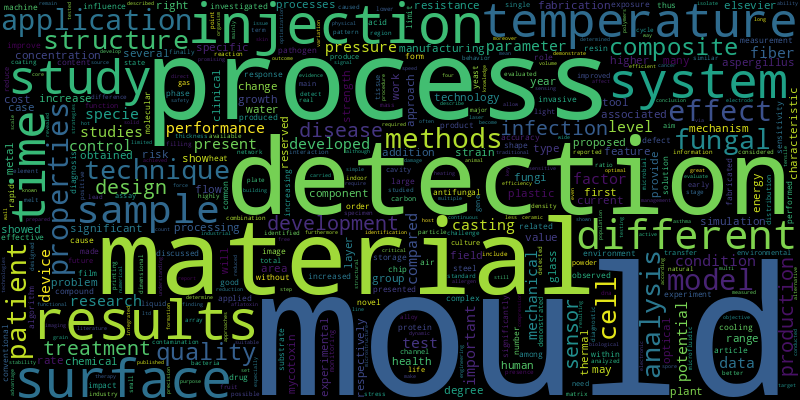

In [ ]:

# Join the different processed titles together.
long_string = ','.join(clean_data)

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=10, height= 400, width= 800, contour_color='steelblue', collocations=False)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:


stop_words = stopwords.words('english')
stop_words.extend(['use', 'two', 'cheese', 'clean','also', 'time', 'food', 'sand', 'used', 'total', 'found', 'nam', 'may', 'videos', 'keywords', 'searched'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data_words = list(sent_to_words(clean_data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['objective', 'assess', 'content', 'quality', 'concerning', 'nasoalveolar', 'mould', 'design', 'containing', 'information', 'relevant', 'nasoalveolar', 'mould', 'presurgical', 'infant', 'orthopedics', 'applicable', 'study', 'rated', 'quality', 'global', 'quality', 'scale', 'determine', 'whether', 'contents', 'selected', 'useful', 'content', 'usefulness']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:50])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 7), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 3), (27, 3), (28, 1), (29, 3), (30, 1), (31, 5), (32, 1), (33, 1), (34, 4), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 10)]


In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.016*"mould" + 0.006*"patients" + 0.006*"fungal" + 0.005*"cell" + '
  '0.005*"infections" + 0.004*"species" + 0.004*"treatment" + 0.003*"disease" '
  '+ 0.003*"fungi" + 0.003*"antifungal"'),
 (1,
  '0.029*"mould" + 0.013*"injection" + 0.008*"process" + 0.006*"flow" + '
  '0.005*"pressure" + 0.004*"cavity" + 0.004*"model" + 0.004*"cooling" + '
  '0.004*"temperature" + 0.004*"results"'),
 (2,
  '0.014*"mould" + 0.011*"fungal" + 0.007*"infections" + 0.006*"invasive" + '
  '0.005*"antifungal" + 0.005*"patients" + 0.005*"species" + '
  '0.005*"aspergillus" + 0.005*"fungi" + 0.004*"clinical"'),
 (3,
  '0.020*"mould" + 0.007*"process" + 0.005*"properties" + 0.004*"surface" + '
  '0.004*"results" + 0.003*"casting" + 0.003*"materials" + 0.003*"mechanical" '
  '+ 0.003*"techniques" + 0.003*"development"'),
 (4,
  '0.011*"mould" + 0.006*"process" + 0.006*"materials" + 0.005*"surface" + '
  '0.004*"applications" + 0.004*"temperature" + 0.004*"fabrication" + '
  '0.003*"pressure" + 0.003*"

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.060381  0.036361       1        1  16.545330
2      0.118909 -0.010537       2        1  15.475725
7     -0.097592  0.004292       3        1  14.819668
4     -0.059523 -0.054971       4        1   9.901392
0      0.089220 -0.001047       5        1   9.477097
1     -0.004226  0.036826       6        1   8.374184
3     -0.032241 -0.027044       7        1   7.054838
6      0.007403 -0.000902       8        1   6.952524
9      0.008145  0.024234       9        1   6.194770
5      0.030287 -0.007212      10        1   5.204471, topic_info=            Term          Freq         Total Category  logprob  loglift
39         mould  32250.000000  32250.000000  Default  30.0000  30.0000
106       fungal   3635.000000   3635.000000  Default  29.0000  29.0000
307    injection   6511.000000   6511.000000  Default  28.0000  28.0000
436   infections   2231.000000   2231.000000  Default  27.0000  27.0000
159  temperature   4321.000000   4321.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
143      process    185.664051   7300.306217  Topic10  -5.8797  -0.7161
500    potential    123.602058   2022.105800  Topic10  -6.2866   0.1608
521  application    114.446709   1630.490974  Topic10  -6.3635   0.2991
106       fungal    121.816578   3635.714111  Topic10  -6.3011  -0.4404
265   properties    118.637378   4077.296906  Topic10  -6.3276  -0.5815

[918 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
2238       6  0.889273      acellular
19780      6  0.105900  administering
19780      8  0.741301  administering
28937      5  0.828394       adoptive
28937      9  0.092044       adoptive
...      ...       ...            ...
5264       6  0.007240           zinc
5264       7  0.050679           zinc
5264       8  0.021720           zinc
5264       9  0.065159           zinc
5264      10  0.007240           zinc

[3781 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 8, 5, 1, 2, 4, 7, 10, 6])

In [ ]:
df['clean_abstract'] = df['Abstract'].apply(lambda x:preprocess_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove stopwords
df['abstract_without_stopwords'] = df['clean_abstract'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
df['abstract_lemmatized'] = df['abstract_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Authors,Article Title,Abstract,Publication Year,clean_abstract,abstract_without_stopwords,abstract_lemmatized
0,"Arslan, C; Aksahin, EC; Yilmaz, RBN; Cakan, DG",Does YouTube (TM) Offer High-Quality Informati...,Objective To assess the content and quality of...,0,objective assess the content and quality video...,objective assess content quality videos concer...,objective ass content quality video concerning...
1,"Li, TZ; Zhou, J; Yuan, ZA; Liu, RY; Li, JM",Intermittent Changes in Temperature and Humidi...,Environmental temperature and humidity play a ...,0,environmental temperature and humidity play vi...,environmental temperature humidity play vital ...,environmental temperature humidity play vital ...
2,"Ch, LK; Kamboj, VK; Bath, SK",Hybridizing slime mould algorithm with simulat...,The existing slime mould algorithm clones the ...,0,the existing slime mould algorithm clones the ...,existing slime mould algorithm clones uniquene...,existing slime mould algorithm clone uniquenes...
3,"Tuncay, T; Baytar, F; Tuncay, B; Sunar, T; Dis...",Effects of Mold Cavity Geometry on Flow Rate a...,"In this study, the effects of the oxide films ...",0,this study the effects the oxide films formed ...,study effects oxide films formed different mou...,study effect oxide film formed different mould...
4,"Karl, T; Zartmann, J; Dalpke, S; Gatti, D; Fro...",Influence of flow-fiber coupling during mold-f...,The anisotropic elastic properties of injectio...,0,the anisotropic elastic properties injection m...,anisotropic elastic properties injection mould...,anisotropic elastic property injection mould c...


In [ ]:
# Drop rows with missing values
df.dropna(subset=['abstract_lemmatized'], inplace=True)

# Or, fill missing values with a placeholder text
df['abstract_lemmatized'].fillna('placeholder', inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Clustering model
# hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples = 5,
# metric='euclidean', prediction_data=True)
kmeans_model = KMeans(n_clusters=10)
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("paraphrase-albert-small-v2")
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')
# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])
# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model,
document_glove_embeddings])

# Count vectorizer
vectorizer_model = CountVectorizer(min_df=10)

# Initiate BERTopic
# topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=hdbscan_model,
#                        embedding_model=stacked_embeddings,min_topic_size=5, n_gram_range=(1, 3))#,diversity=0.8)#vectorizer_model=vectorizer_model)# Other options for embedding_model are sentence_model, hf_model,roberta_model

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 2))
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['abstract_lemmatized'])#abstract_lemmatized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the list of topics
topic_model.get_topic_info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Count,Name
0,0,2284,0_mould_injection_process_injection mould
1,1,2060,1_mycotoxin_sample_mould_detection
2,2,1702,2_sensor_detection_device_application
3,3,1221,3_composite_fiber_material_mould
4,4,1023,4_infection_patient_fungal_invasive
5,5,946,5_mould_process_model_system
6,6,804,6_mould_exposure_asthma_indoor
7,7,745,7_patient_cancer_tissue_study
8,8,623,8_cell_protein_gene_specie
9,9,539,9_mould_glass_lens_optical


In [ ]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('mould', 0.05774414844443021),
 ('injection', 0.02757075174173307),
 ('process', 0.023913266594875762),
 ('injection mould', 0.022232080427158872),
 ('temperature', 0.02073849017394805),
 ('casting', 0.0194689485892509),
 ('surface', 0.013958670729644618),
 ('material', 0.012456896867066617),
 ('result', 0.01158882144933439),
 ('cooling', 0.011447768936850938)]

In [ ]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
related_topics, similar = topic_model.find_topics("mould", top_n=8); related_topics
# Visualize intertopic distance
topic_model.visualize_topics(related_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:


In [ ]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
df['topic_prediction'] = topic_prediction
# Take a look at the data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Authors,Article Title,Abstract,Publication Year,clean_abstract,abstract_without_stopwords,abstract_lemmatized,topic_prediction
0,"Arslan, C; Aksahin, EC; Yilmaz, RBN; Cakan, DG",Does YouTube (TM) Offer High-Quality Informati...,Objective To assess the content and quality of...,0,objective assess the content and quality video...,objective assess content quality videos concer...,objective ass content quality video concerning...,5
1,"Li, TZ; Zhou, J; Yuan, ZA; Liu, RY; Li, JM",Intermittent Changes in Temperature and Humidi...,Environmental temperature and humidity play a ...,0,environmental temperature and humidity play vi...,environmental temperature humidity play vital ...,environmental temperature humidity play vital ...,1
2,"Ch, LK; Kamboj, VK; Bath, SK",Hybridizing slime mould algorithm with simulat...,The existing slime mould algorithm clones the ...,0,the existing slime mould algorithm clones the ...,existing slime mould algorithm clones uniquene...,existing slime mould algorithm clone uniquenes...,5
3,"Tuncay, T; Baytar, F; Tuncay, B; Sunar, T; Dis...",Effects of Mold Cavity Geometry on Flow Rate a...,"In this study, the effects of the oxide films ...",0,this study the effects the oxide films formed ...,study effects oxide films formed different mou...,study effect oxide film formed different mould...,0
4,"Karl, T; Zartmann, J; Dalpke, S; Gatti, D; Fro...",Influence of flow-fiber coupling during mold-f...,The anisotropic elastic properties of injectio...,0,the anisotropic elastic properties injection m...,anisotropic elastic properties injection mould...,anisotropic elastic property injection mould c...,3


In [ ]:

# New data for the review
new_review = "I like the new headphone. Its sound quality is great."
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics);
# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [9, 2, 5], and the similarities are [0.13 0.11 0.07]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 9 are:
[('mould', 0.05292702052534522), ('glass', 0.03889093458942231), ('lens', 0.03517390036552448), ('optical', 0.02953567462397093), ('process', 0.025785883731416232), ('surface', 0.02277812804962053), ('precision', 0.015514985675497828), ('material', 0.014545794461715715), ('glass mould', 0.014270164479366328), ('fabrication', 0.012226298168150577)]
The top keywords for topic 2 are:
[('sensor', 0.020275943923933806), ('detection', 0.018589298571370916), ('device', 0.017460353552397185), ('application', 0.013403603976735064), ('chip', 0.01249139872587157), ('microfluidic', 0.012411248714887975), ('material', 0.01228945374420641), ('mould', 0.01137845183660381), ('electrode', 0.011233354306212), ('structure', 0.011100805431777386)]
The top keywords for topic 5 are:
[('mould', 0.026966879291076922), ('process', 0.022923492737788955), ('model', 0.019558391221077675), ('system', 0.019297711373110968), ('algorithm', 0.018088433755081346), ('machine', 0.0152021

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# # Save the topic model
# topic_model.save("papers_nips_topic_model")
# # Load the topic model
# my_model = BERTopic.load("papers_nips_topic_model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

